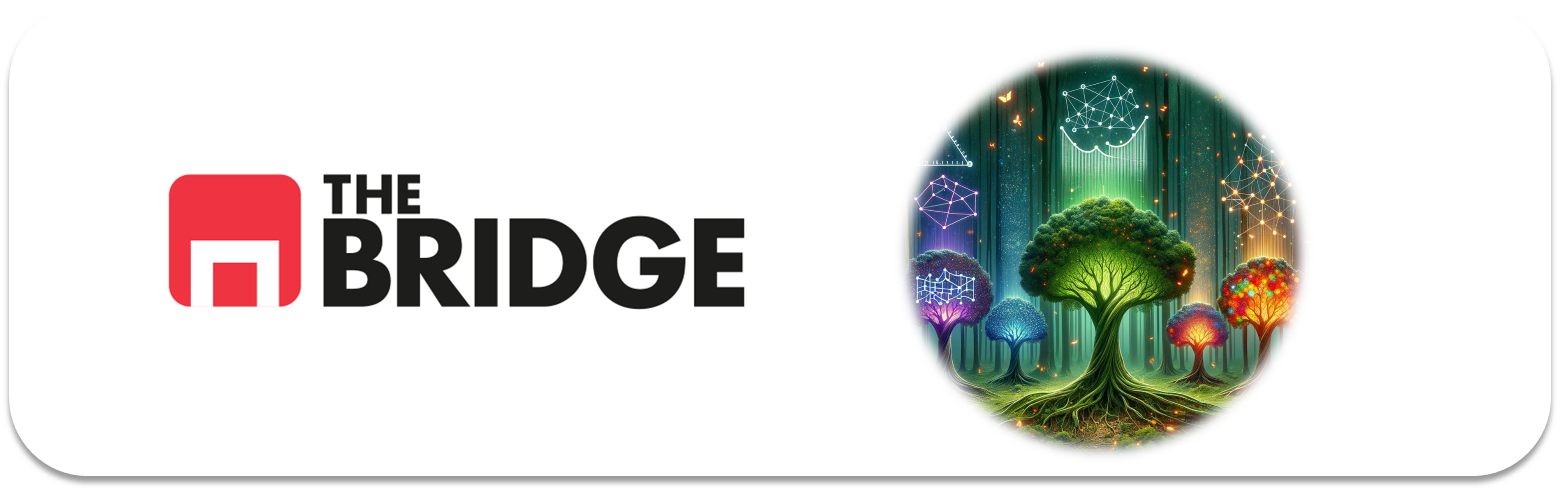

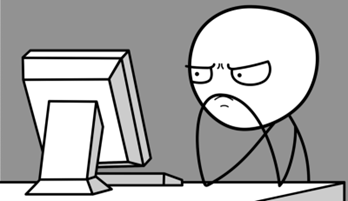

Para ejercitarte y afianzar lo aprendido sobre **Regresion con Árboles de decisión**, completa los siguientes ejercicios. Recuerda que necesitarás datos que están en el directorio data que acompaña al notebook (búscalo en el repositorio de ejercicios)
  
La solución a los mismos las tienes ya, intenta no mirarlos de primeras pero no dejes de hacerlo cuando hayas terminado por si te pudieran aportar.

Este conjunto de ejercicios trabajan sobre un dataset de temperaturas tomados de la ciudad de Seattle. El objetivo es intentar predecir lo mejor posible la máxima temperatura (columna `actual`) que alcanzaremos al día siguiente. Para ello contaremos con temperaturas de los dos días anteriores, históricos de máximas temperaturas y un amigo bastante chapas que te da su predicción del tiempo cada día.

**Resumen de datos**:
* year: 2016 for all data points
* month: number for month of the year
* day: number for day of the year
* week: day of the week as a character string
* temp_2: max temperature 2 days prior
* temp_1: max temperature 1 day prior
* average: historical average max temperature
* actual: max temperature measurement
* friend: your friend’s prediction, a random number between 20 below the average and 20 above the average



### Ejercicio 0

Importa los paquetes y módulos que necesites a lo largo del notebook

In [48]:
import time

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error
from sklearn.model_selection import train_test_split 
from sklearn.tree import DecisionTreeRegressor, plot_tree


### Ejercicio 1

Importa el csv "temps.csv"

In [2]:
df_temps = pd.read_csv('./data/temps.csv')
df_temps

,year,month,day,week,temp_2,temp_1,average,actual,forecast_noaa,forecast_acc,forecast_under,friend
0,2016,1,1,Fri,45,45,45.6,45,43,50,44,29
1,2016,1,2,Sat,44,45,45.7,44,41,50,44,61
2,2016,1,3,Sun,45,44,45.8,41,43,46,47,56
3,2016,1,4,Mon,44,41,45.9,40,44,48,46,53
4,2016,1,5,Tues,41,40,46.0,44,46,46,46,41
...,...,...,...,...,...,...,...,...,...,...,...,...
343,2016,12,27,Tues,42,42,45.2,47,41,50,47,47
344,2016,12,28,Wed,42,47,45.3,48,41,49,44,58
345,2016,12,29,Thurs,47,48,45.3,48,43,50,45,65
346,2016,12,30,Fri,48,48,45.4,57,44,46,44,42


In [3]:
df_temps.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 348 entries, 0 to 347
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   year            348 non-null    int64  
 1   month           348 non-null    int64  
 2   day             348 non-null    int64  
 3   week            348 non-null    object 
 4   temp_2          348 non-null    int64  
 5   temp_1          348 non-null    int64  
 6   average         348 non-null    float64
 7   actual          348 non-null    int64  
 8   forecast_noaa   348 non-null    int64  
 9   forecast_acc    348 non-null    int64  
 10  forecast_under  348 non-null    int64  
 11  friend          348 non-null    int64  
dtypes: float64(1), int64(10), object(1)
memory usage: 32.8+ KB


### Ejercicio 2

Haz un one-hot encoding de las variables categóricas del dataset

In [7]:
df_temps.nunique()

year                1
month              12
day                31
week                7
temp_2             56
temp_1             56
average           243
actual             55
forecast_noaa      37
forecast_acc       37
forecast_under     36
friend             66
dtype: int64

En mi opinión "month" y "week" son categóricas. "day" es una numérica discreta. Y "year" me la podría cargar.

In [10]:
df_temps = pd.get_dummies(df_temps, columns=['month', 'week'], dtype=int)
df_temps.head()

,year,day,temp_2,temp_1,average,actual,forecast_noaa,forecast_acc,forecast_under,friend,...,month_10,month_11,month_12,week_Fri,week_Mon,week_Sat,week_Sun,week_Thurs,week_Tues,week_Wed
0,2016,1,45,45,45.6,45,43,50,44,29,...,0,0,0,1,0,0,0,0,0,0
1,2016,2,44,45,45.7,44,41,50,44,61,...,0,0,0,0,0,1,0,0,0,0
2,2016,3,45,44,45.8,41,43,46,47,56,...,0,0,0,0,0,0,1,0,0,0
3,2016,4,44,41,45.9,40,44,48,46,53,...,0,0,0,0,1,0,0,0,0,0
4,2016,5,41,40,46.0,44,46,46,46,41,...,0,0,0,0,0,0,0,0,1,0


### Ejercicio 3

Divide en train y test

In [19]:
# Hubiera preferido estratificar por "month" pero como he hecho el one-hot encoding pues ya nada
train_set, test_set = train_test_split(df_temps, test_size=0.2, random_state=42, stratify=df_temps['day'])

# X and y creation
target = 'actual'
X_train = train_set.drop(columns=[target])
y_train = train_set[target]
X_test = test_set.drop(columns=[target])
y_test = test_set[target]

### Ejercicio 4

Instancia un DecisionTreeRegressor de sklearn con hiperparámetros por defecto y entrénalo.

In [20]:
# Instanciar modelo 
tree_reg = DecisionTreeRegressor(random_state=42)

# Entrenar modelo
tree_reg.fit(X_train, y_train)

DecisionTreeRegressor(random_state=42)

In [23]:
pred_train = tree_reg.predict(X_train)

### Ejercicio 5

Calcula su MAE sin usar sklearn.

In [26]:
# Cálculo de MAE
mae_sklearn = mean_absolute_error(y_train, pred_train)
print("MAE usando sklearn:", mae_sklearn)

# Cálculo manual del MAE. El ".iloc" es para asegurar que coge los indices en orden, que se han desmontado a hacer el split
mae_manual = sum(abs(pred_train[i] - y_train.iloc[i]) for i in range(len(y_train))) / len(y_train)
print("MAE sin usar sklearn:", mae_manual)


MAE usando sklearn: 0.0
MAE sin usar sklearn: 0.0


Sospecho de un resultado tan bueno, pero es que al no haber puesto hiperparámetros en el árbol lo ajusta perfectamente a todos los resultados. Esto no me interesa porque fallará mucho en predicciones sobre el test.

### Ejercicio 6

Calcula su MAPE sin usar sklearn

In [33]:
# Cálculo de MAPE
mape_sklearn = mean_absolute_percentage_error(y_train, pred_train) * 100
print("MAPE usando sklearn:", mape_sklearn)

# Cálculo manual del MAPE
mape_manual = (sum(abs((y_train.iloc[i] - pred_train[i]) / y_train.iloc[i]) for i in range(len(y_train))) 
               / len(y_train)) * 100
print("MAPE sin usar sklearn:", mape_manual)


MAPE usando sklearn: 0.0
MAPE sin usar sklearn: 0.0


### Ejercicio 7

Representa el árbol de decision

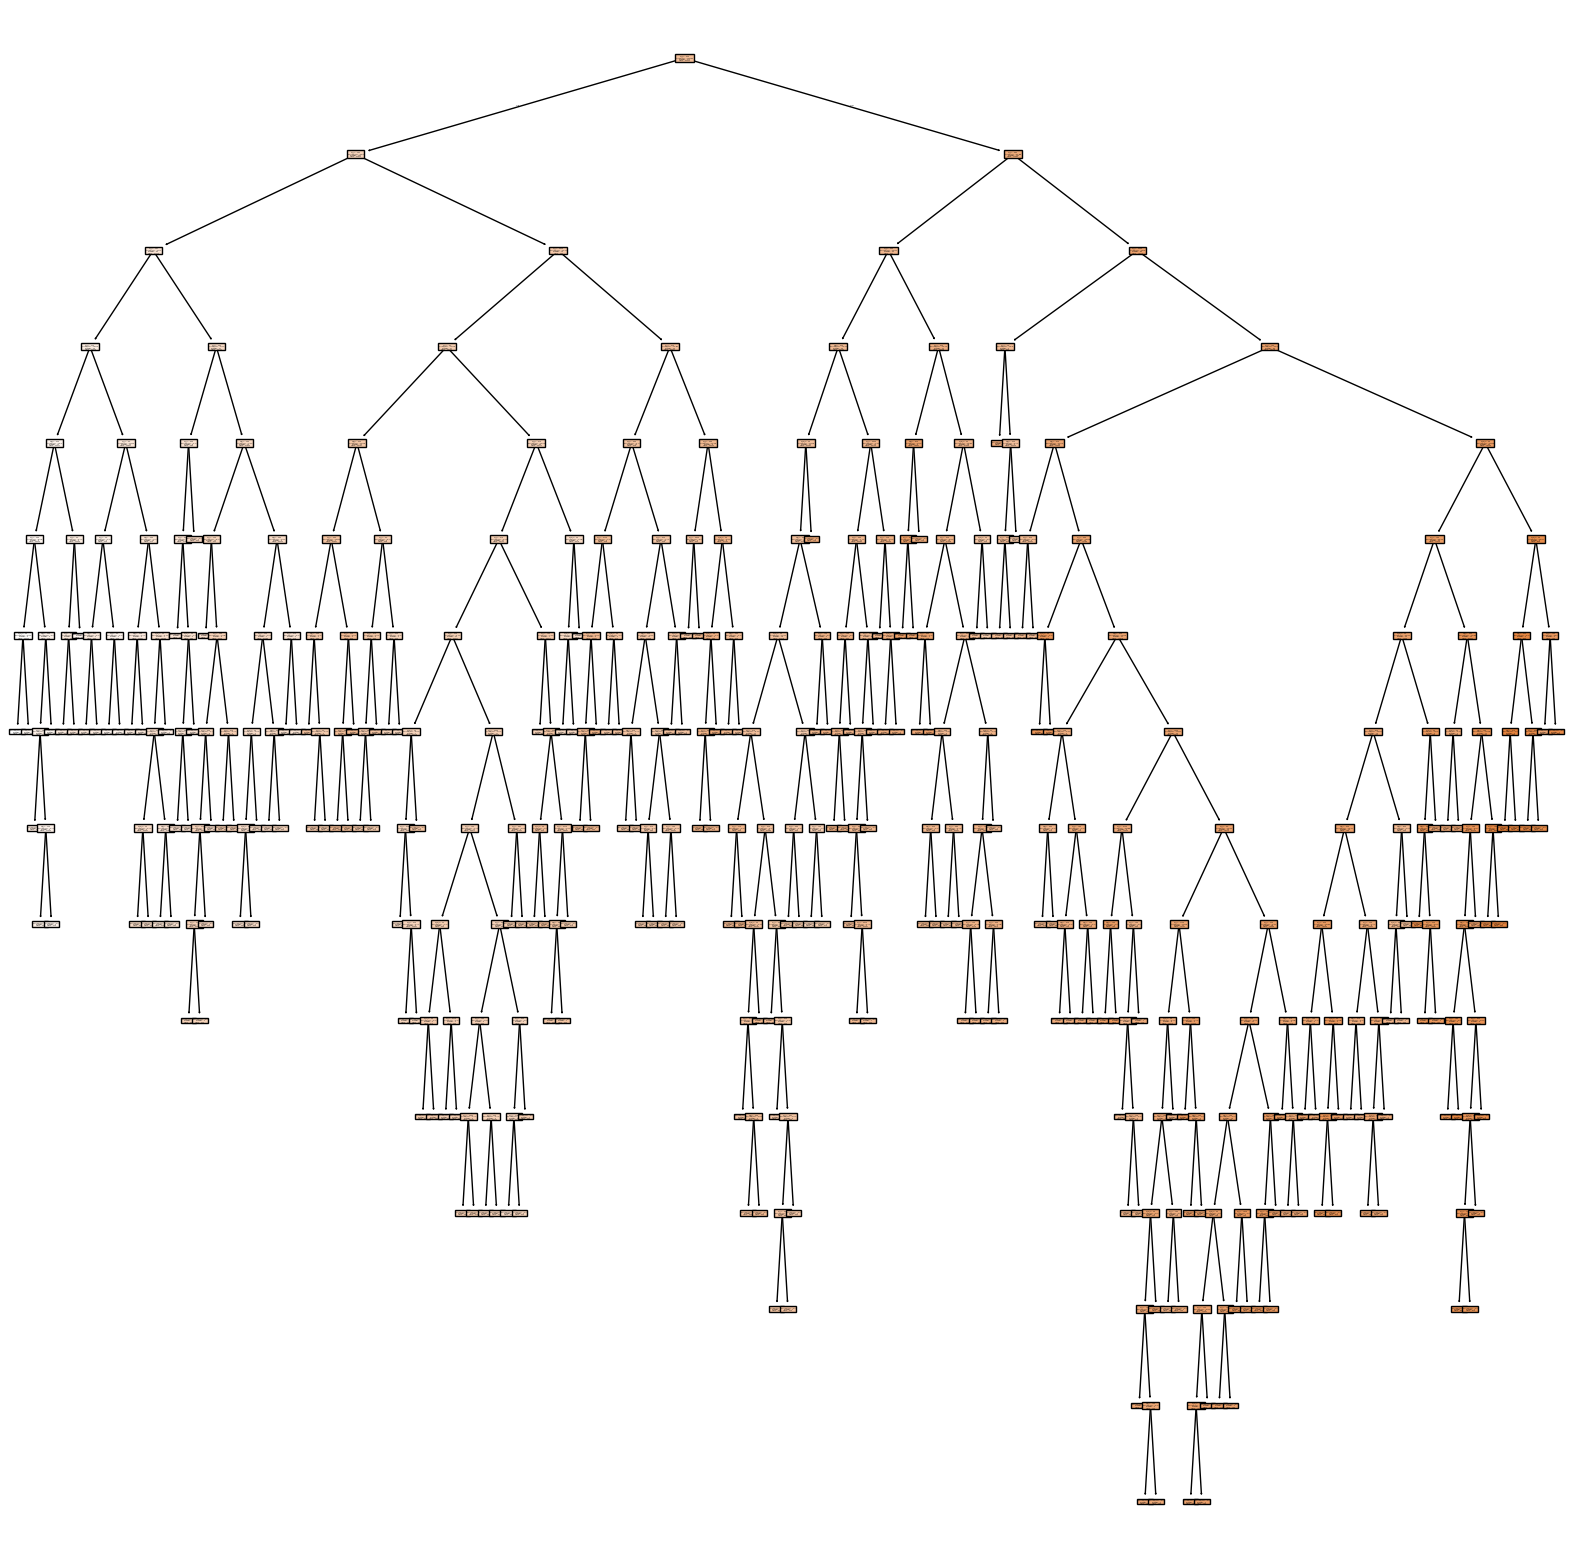

In [35]:
plt.figure(figsize=(20,20))
plot_tree(tree_reg,
          filled=True);

Efectivamente queda gigante y debe tener una rama para cada hoja (todos los casos).

### Ejercicio 8. 

Instancia un nuevo árbol ahora con max_depth a 3 y vuelve a entrenarlo

In [36]:
# Instanciar modelo 
tree_reg_limited = DecisionTreeRegressor(max_depth=3, random_state=42)

# Entrenar modelo
tree_reg_limited.fit(X_train, y_train)

# Predicción
pred_train_limited = tree_reg_limited.predict(X_train)

### Ejercicio 9

Vuelve a calcular MAE y MAPE

In [37]:
# Cálculo de MAE
mae_sklearn = mean_absolute_error(y_train, pred_train_limited)
print("MAE usando sklearn:", mae_sklearn)

# Cálculo manual del MAE. El ".iloc" es para asegurar que coge los indices en orden, que se han desmontado a hacer el split
mae_manual = sum(abs(pred_train_limited[i] - y_train.iloc[i]) for i in range(len(y_train))) / len(y_train)
print("MAE sin usar sklearn:", mae_manual)

# Cálculo de MAPE
mape_sklearn = mean_absolute_percentage_error(y_train, pred_train_limited) * 100
print("MAPE usando sklearn:", mape_sklearn)

# Cálculo manual del MAPE
mape_manual = (sum(abs((y_train.iloc[i] - pred_train_limited[i]) / y_train.iloc[i]) for i in range(len(y_train))) 
               / len(y_train)) * 100
print("MAPE sin usar sklearn:", mape_manual)

MAE usando sklearn: 3.74966820517928
MAE sin usar sklearn: 3.7496682051792827
MAPE usando sklearn: 5.970551524081514
MAPE sin usar sklearn: 5.970551524081511


### Ejercicio 10

Vuelve a representar su árbol

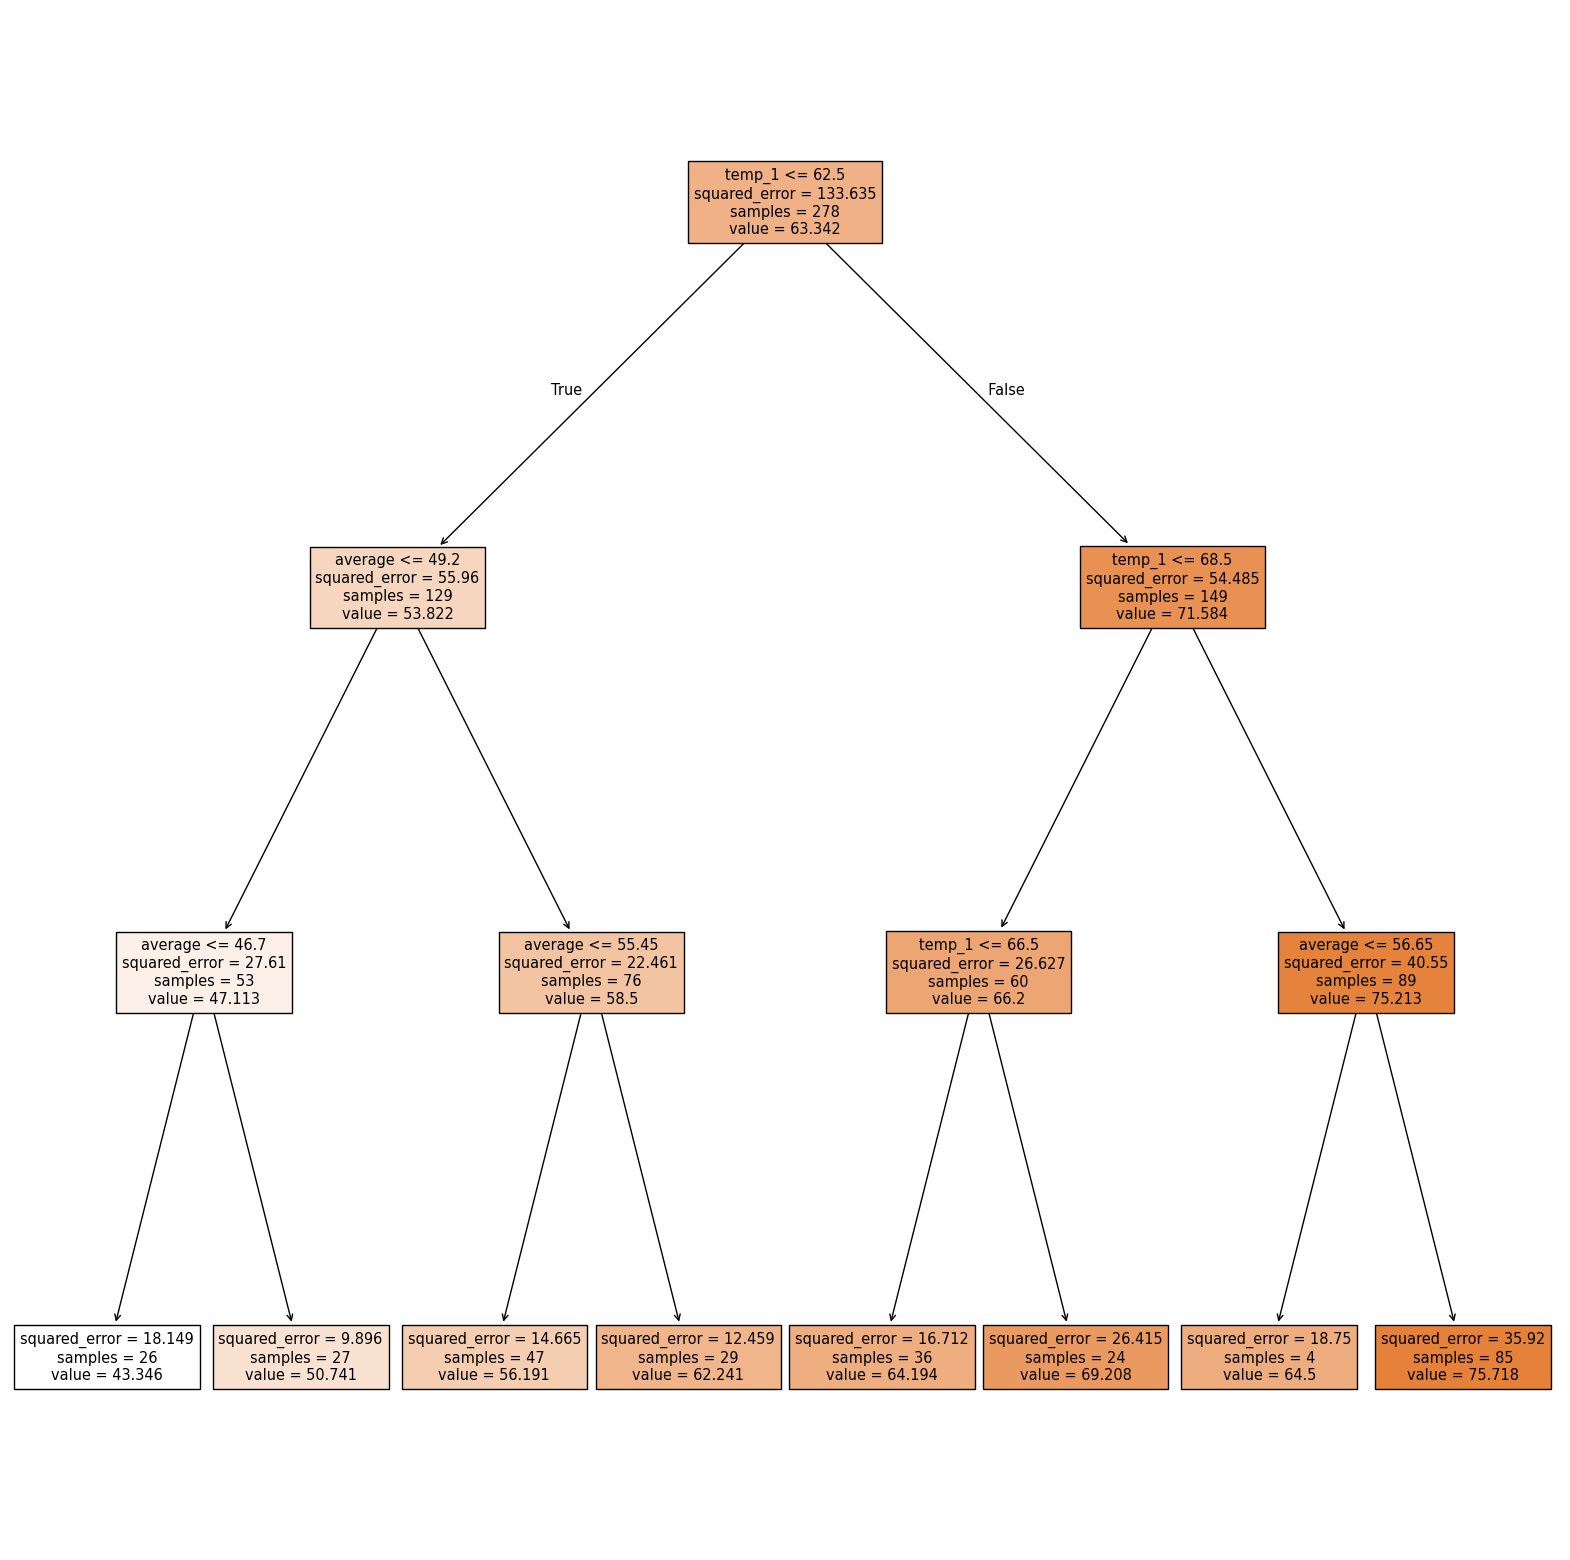

In [47]:
plt.figure(figsize=(20,20))
plot_tree(tree_reg_limited,
          feature_names=X_train.columns,
          filled=True);

### Ejercicio 11

Obten el `feature_importances` de cada variable en el último modelo. Los árboles una vez entrenados tienen un atributo que te lo permite, revisa la documentación si es necesario.

In [52]:
# Obtener las importancias de las características
importances = tree_reg_limited.feature_importances_

importance_df = pd.DataFrame({
    'Feature': X_train.columns,  # Lista de nombres de las variables
    'Importance': importances
})

importance_df = importance_df.sort_values(by='Importance', ascending=False)

print(importance_df)


           Feature  Importance
3           temp_1    0.809338
4          average    0.190662
1              day    0.000000
0             year    0.000000
2           temp_2    0.000000
5    forecast_noaa    0.000000
6     forecast_acc    0.000000
7   forecast_under    0.000000
8           friend    0.000000
9          month_1    0.000000
10         month_2    0.000000
11         month_3    0.000000
12         month_4    0.000000
13         month_5    0.000000
14         month_6    0.000000
15         month_7    0.000000
16         month_8    0.000000
17         month_9    0.000000
18        month_10    0.000000
19        month_11    0.000000
20        month_12    0.000000
21        week_Fri    0.000000
22        week_Mon    0.000000
23        week_Sat    0.000000
24        week_Sun    0.000000
25      week_Thurs    0.000000
26       week_Tues    0.000000
27        week_Wed    0.000000
